# EntHire Internship Project

## Importing libraries

In [1]:
#For reading dataset and working with arrays
import numpy as np
import pandas as pd

#For data preprocessing, train-test split and metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

#For Deep Learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.regularizers import l2

#For data visualization
import matplotlib.pyplot as plt

#For API
from wsgiref.simple_server import make_server
from pyramid.config import Configurator
from pyramid.response import Response

Using TensorFlow backend.


## Reading the data

In [2]:
Airline=pd.read_csv("airline_sentiment_analysis.csv")

## Data Preprocessing

In [3]:
Airline=Airline.loc[:,::-1]

In [4]:
Airline=Airline.iloc[:,0:2].values

In [5]:
Airline[:,0]=[x.lower() for x in Airline[:,0]]

In [6]:
#To work with categorical variable:reviews 
labelencoder=LabelEncoder()
Airline[:,1]=labelencoder.fit_transform(Airline[:,1])


## Splitting the train and test set

In [7]:
train_data,test_data=train_test_split(Airline, test_size=0.25,random_state=0)

### Use OOPs concept to load training data

In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [9]:
class data_load:
    def __init__(self, train_data, test_data):
        self.train_data=train_data
        self.test_data=test_data
   
    
    def Labels(self,train_data,test_data):
        
        training_sentences=[]
        training_labels=[]

        testing_sentences=[]
        testing_labels=[]

        for s,l in train_data:
          training_sentences.append(s)
          training_labels.append(l)

        for s,l in test_data:
          testing_sentences.append(s)
          testing_labels.append(l)
            
        y_train=np.array(training_labels)
        y_test=np.array(testing_labels)
        
        self.training_sentences=training_sentences
        self.testing_sentences=testing_sentences
        
        return (y_train,y_test)
        
    def Predictors(self,vocab_size,maxlen,truncating='post'):
        tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
        tokenizer.fit_on_texts(self.training_sentences)
        
        word_index=tokenizer.word_index
        self.word_index=word_index

        #For training data
        sequences=tokenizer.texts_to_sequences(self.training_sentences)
        x_train=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)

        #For testing data
        testing_sequences=tokenizer.texts_to_sequences(self.testing_sentences)
        x_test = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)
        return (x_train,x_test)
    
    #Reverse the word index key-value pair    
    def decode_review(self,text):
        reverse_word_index= dict([(value,key) for(key, value) in self.word_index.items()])
        return " ".join([reverse_word_index.get(i,"?") for i in text])

In [10]:
Data=data_load(train_data,test_data)

In [11]:
(y_train,y_test)=Data.Labels(train_data,test_data)

In [12]:
(x_train, x_test)=Data.Predictors(vocab_size,max_length)

# Creating model

### Use OOPs concept to train the model

In [13]:
tf.keras.backend.clear_session()
class build_model:
   def __init__(self,x_train,y_train,x_test,y_test,callbacks=None, epochs=10):
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    
   def layers(self, vocab_size,embedding_dim,num_epochs,max_length):
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7* 10**(epoch / 20))
    
    opt = tf.keras.optimizers.Adam(learning_rate=1e-7)
    
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    history = model.fit(self.x_train, self.y_train, epochs=num_epochs, validation_data=(self.x_test, self.y_test), 
                        verbose=2,callbacks=[lr_schedule])
    return history,model

In [14]:
base_model=build_model(x_train,y_train,x_test,y_test)

In [15]:
(history,model)=base_model.layers(vocab_size,embedding_dim,100,max_length)

Train on 8655 samples, validate on 2886 samples
Epoch 1/100
8655/8655 - 5s - loss: 0.6954 - accuracy: 0.2024 - val_loss: 0.6953 - val_accuracy: 0.2117
Epoch 2/100
8655/8655 - 1s - loss: 0.6953 - accuracy: 0.2024 - val_loss: 0.6952 - val_accuracy: 0.2117
Epoch 3/100
8655/8655 - 1s - loss: 0.6952 - accuracy: 0.2027 - val_loss: 0.6951 - val_accuracy: 0.2124
Epoch 4/100
8655/8655 - 1s - loss: 0.6951 - accuracy: 0.2029 - val_loss: 0.6949 - val_accuracy: 0.2124
Epoch 5/100
8655/8655 - 1s - loss: 0.6949 - accuracy: 0.2032 - val_loss: 0.6948 - val_accuracy: 0.2134
Epoch 6/100
8655/8655 - 1s - loss: 0.6948 - accuracy: 0.2034 - val_loss: 0.6946 - val_accuracy: 0.2141
Epoch 7/100
8655/8655 - 1s - loss: 0.6946 - accuracy: 0.2060 - val_loss: 0.6944 - val_accuracy: 0.2173
Epoch 8/100
8655/8655 - 1s - loss: 0.6944 - accuracy: 0.2126 - val_loss: 0.6942 - val_accuracy: 0.2266
Epoch 9/100
8655/8655 - 1s - loss: 0.6941 - accuracy: 0.2268 - val_loss: 0.6940 - val_accuracy: 0.2481
Epoch 10/100
8655/8655 - 

Epoch 80/100
8655/8655 - 1s - loss: 0.1246 - accuracy: 0.9561 - val_loss: 0.1905 - val_accuracy: 0.9231
Epoch 81/100
8655/8655 - 1s - loss: 0.1108 - accuracy: 0.9614 - val_loss: 0.1867 - val_accuracy: 0.9276
Epoch 82/100
8655/8655 - 1s - loss: 0.0986 - accuracy: 0.9653 - val_loss: 0.1848 - val_accuracy: 0.9304
Epoch 83/100
8655/8655 - 1s - loss: 0.0892 - accuracy: 0.9683 - val_loss: 0.2061 - val_accuracy: 0.9210
Epoch 84/100
8655/8655 - 1s - loss: 0.0798 - accuracy: 0.9723 - val_loss: 0.1897 - val_accuracy: 0.9314
Epoch 85/100
8655/8655 - 1s - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.1900 - val_accuracy: 0.9283
Epoch 86/100
8655/8655 - 1s - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.2104 - val_accuracy: 0.9272
Epoch 87/100
8655/8655 - 1s - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.2025 - val_accuracy: 0.9297
Epoch 88/100
8655/8655 - 1s - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.2672 - val_accuracy: 0.9182
Epoch 89/100
8655/8655 - 1s - loss: 0.0356 - accuracy: 0.9894 - 

Text(0, 0.5, 'Loss')

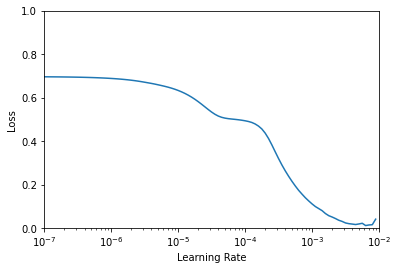

In [16]:
# FROM THIS PICK A LEARNING RATE
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7,1e-2, 0, 1])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

### For overfitting: Introduce Dropout layer and L2 Regularizer 

### For Hyper parameter tuning: Learning Rate Optimization

In [17]:
def compile_train_model(x_train, y_train, x_test, y_test,epochs=100):
    
    opt = tf.keras.optimizers.Adam(learning_rate=6e-5)
    
    opt_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    
                   
    opt_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    final_model=opt_model.fit(x_train, y_train,epochs=epochs,validation_data=(x_test,y_test))
    return opt_model,final_model

In [18]:
(opt_model,final_model)=compile_train_model(x_train,y_train,x_test,y_test)

Train on 8655 samples, validate on 2886 samples
Epoch 1/100
8655/8655 [==============================] - 3s 300us/sample - loss: 0.7002 - accuracy: 0.7747 - val_loss: 0.6898 - val_accuracy: 0.7883
Epoch 2/100
8655/8655 [==============================] - 1s 158us/sample - loss: 0.6783 - accuracy: 0.7976 - val_loss: 0.6683 - val_accuracy: 0.7883
Epoch 3/100
8655/8655 [==============================] - 1s 152us/sample - loss: 0.6508 - accuracy: 0.7976 - val_loss: 0.6346 - val_accuracy: 0.7883
Epoch 4/100
8655/8655 [==============================] - 1s 149us/sample - loss: 0.6151 - accuracy: 0.7976 - val_loss: 0.6011 - val_accuracy: 0.7883
Epoch 5/100
8655/8655 [==============================] - 1s 166us/sample - loss: 0.5840 - accuracy: 0.7976 - val_loss: 0.5739 - val_accuracy: 0.7883
Epoch 6/100
8655/8655 [==============================] - 1s 161us/sample - loss: 0.5594 - accuracy: 0.7976 - val_loss: 0.5539 - val_accuracy: 0.7883
Epoch 7/100
8655/8655 [==============================] - 1

8655/8655 [==============================] - 1s 147us/sample - loss: 0.4121 - accuracy: 0.8036 - val_loss: 0.4149 - val_accuracy: 0.7900
Epoch 56/100
8655/8655 [==============================] - ETA: 0s - loss: 0.4060 - accuracy: 0.80 - 1s 140us/sample - loss: 0.4066 - accuracy: 0.8037 - val_loss: 0.4090 - val_accuracy: 0.7945
Epoch 57/100
8655/8655 [==============================] - 1s 143us/sample - loss: 0.3991 - accuracy: 0.8137 - val_loss: 0.4035 - val_accuracy: 0.7976
Epoch 58/100
8655/8655 [==============================] - 1s 145us/sample - loss: 0.3946 - accuracy: 0.8159 - val_loss: 0.3983 - val_accuracy: 0.8056
Epoch 59/100
8655/8655 [==============================] - 1s 149us/sample - loss: 0.3897 - accuracy: 0.8239 - val_loss: 0.3932 - val_accuracy: 0.8139
Epoch 60/100
8655/8655 [==============================] - 1s 144us/sample - loss: 0.3840 - accuracy: 0.8297 - val_loss: 0.3882 - val_accuracy: 0.8247
Epoch 61/100
8655/8655 [==============================] - 1s 145us/samp

## Prediction

In [19]:
y_pred=opt_model.predict(x_test)
y_pred = (y_pred> 0.5)

In [20]:
#Model Evaluation
train_acc = opt_model.evaluate(x_train, y_train)
test_acc = opt_model.evaluate(x_test,y_test)
print(train_acc, test_acc)

2886/2886 [==============================] - 0s 49us/sample - loss: 0.2979 - accuracy: 0.9030
[0.26806078645481946, 0.9175043] [0.2979303887133291, 0.9029799]


### Use OOPs concept to implement inference

In [21]:
class Metrics:
  def __init__(self,test_label, Predicted_label):
    self.test_label=test_label
    self.Predicted_label=Predicted_label
  def ConfusionMatrix(self,test_label,Predicted_label):
    cm=confusion_matrix(test_label,Predicted_label)
    return cm
    acc=accuracy_score(test_label,Predicted_label)
  def Report(self,test_label,Predicted_label):
    report = classification_report(test_label, Predicted_label)
    return report

In [22]:
Inference=Metrics(y_test, y_pred)

In [23]:
print(Inference.ConfusionMatrix(y_test,y_pred))

[[2218   57]
 [ 223  388]]


In [24]:
print(Inference.Report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2275
           1       0.87      0.64      0.73       611

    accuracy                           0.90      2886
   macro avg       0.89      0.80      0.84      2886
weighted avg       0.90      0.90      0.90      2886



## Data Visualization

In [26]:
loss_train = final_model.history['loss']
loss_val = final_model.history['val_loss']
epochs=range(len(loss_train)) 

def plot_loss(training_loss,testing_loss):    

    plt.plot(epochs, training_loss, 'g', label='Training loss')
    plt.plot(epochs, testing_loss, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

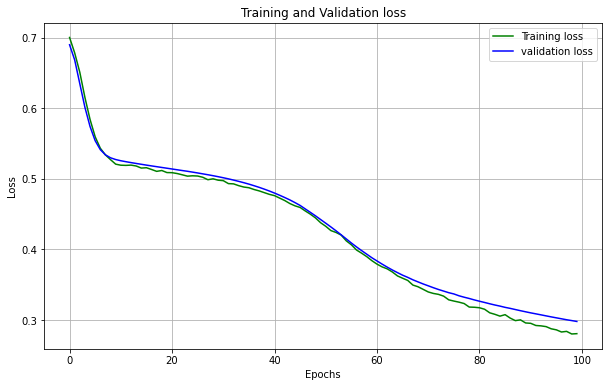

In [27]:
plt.figure(figsize=(10,6))
plot_loss(loss_train,loss_val)

In [28]:
acc_train = final_model.history['accuracy']
acc_val = final_model.history['val_accuracy']


def plot_accuracy(training_acc,testing_acc):    

    plt.plot(epochs, training_acc, 'g', label='Training Accuracy')
    plt.plot(epochs, testing_acc, 'b', label='validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

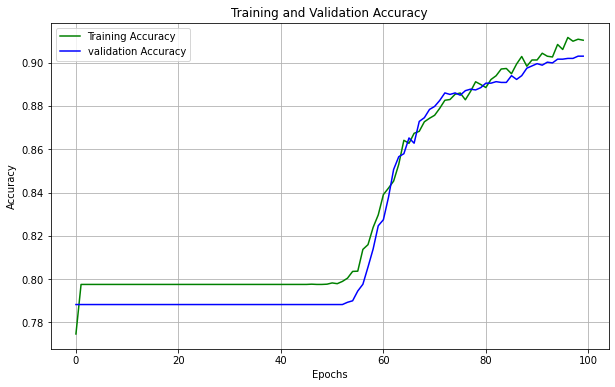

In [29]:
plt.figure(figsize=(10,6))
plot_accuracy(acc_train,acc_val)

## Pickle

In [30]:
opt_model.save("model.h10")
print("Saved model to disk")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.h10\assets
Saved model to disk


In [31]:
Airplane_reviews = tf.keras.models.load_model('model.h10')